<a href="https://colab.research.google.com/github/Rachit3/Weight_Category-EDA_and_ML_models-/blob/main/Weight_Category_prediction(EDA%26ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Data Preprocessing

In [55]:
#download dataset from :  https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels
data = pd.read_csv('/content/drive/MyDrive/datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [57]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**we need to rename the columns meaningfuly**

In [58]:
data.rename(columns={'FAVC':'high_cal_food','FCVC':'vegetables_in_meals','NCP':'meals','CAEC':'food_between_meals','CH2O':'water_litres','SCC':'monitor_calories','FAF':'workout_days','TUE':'workout_hrs','CALC':'alcohol','MTRANS':'transport','NObeyesdad':'result'},inplace=True)

In [59]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'high_cal_food', 'vegetables_in_meals', 'meals', 'food_between_meals',
       'SMOKE', 'water_litres', 'monitor_calories', 'workout_days',
       'workout_hrs', 'alcohol', 'transport', 'result'],
      dtype='object')

In [60]:
data[data.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,vegetables_in_meals,meals,food_between_meals,SMOKE,water_litres,monitor_calories,workout_days,workout_hrs,alcohol,transport,result
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


these are duplicates, but chances are, it may be a co-incidence. Lets not remove them

In [61]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
high_cal_food                     0
vegetables_in_meals               0
meals                             0
food_between_meals                0
SMOKE                             0
water_litres                      0
monitor_calories                  0
workout_days                      0
workout_hrs                       0
alcohol                           0
transport                         0
result                            0
dtype: int64

In [62]:
data.shape

(2111, 17)

In [63]:
data['result'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

we need to replace these values as per the question so that less categories are present for classification.

In [64]:
value_mapping = {
    'Normal_Weight': 'Normal',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obesity',
    'Insufficient_Weight': 'Underweight',
    'Obesity_Type_II': 'Obesity',
    'Obesity_Type_III': 'Extreme Obesity'
}

# Replace values in the column using the mapping
data['result'] = data['result'].replace(value_mapping)

In [65]:
data['result'].unique()

array(['Normal', 'Overweight', 'Obesity', 'Underweight',
       'Extreme Obesity'], dtype=object)

# EDA


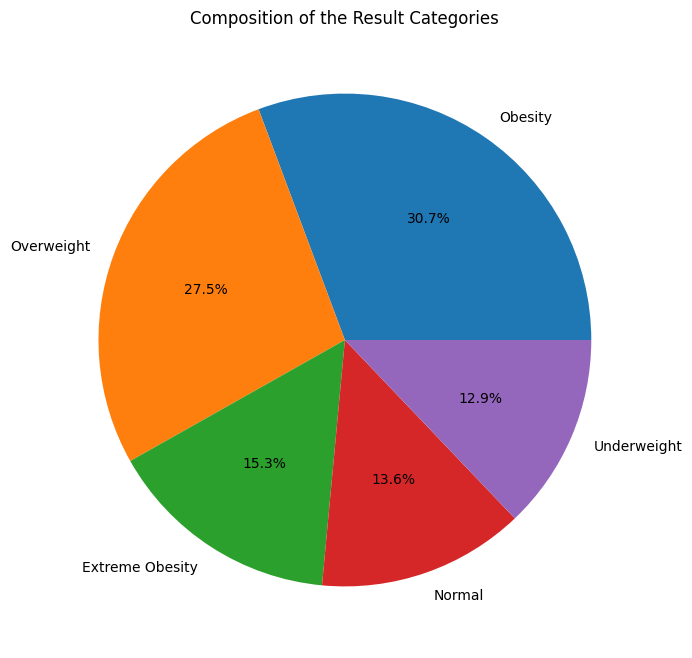

In [66]:
plt.figure(figsize=(15,8))
result_counts = data['result'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%')
plt.title('Composition of the Result Categories')
plt.show()


We can infer that obese people are in majority.

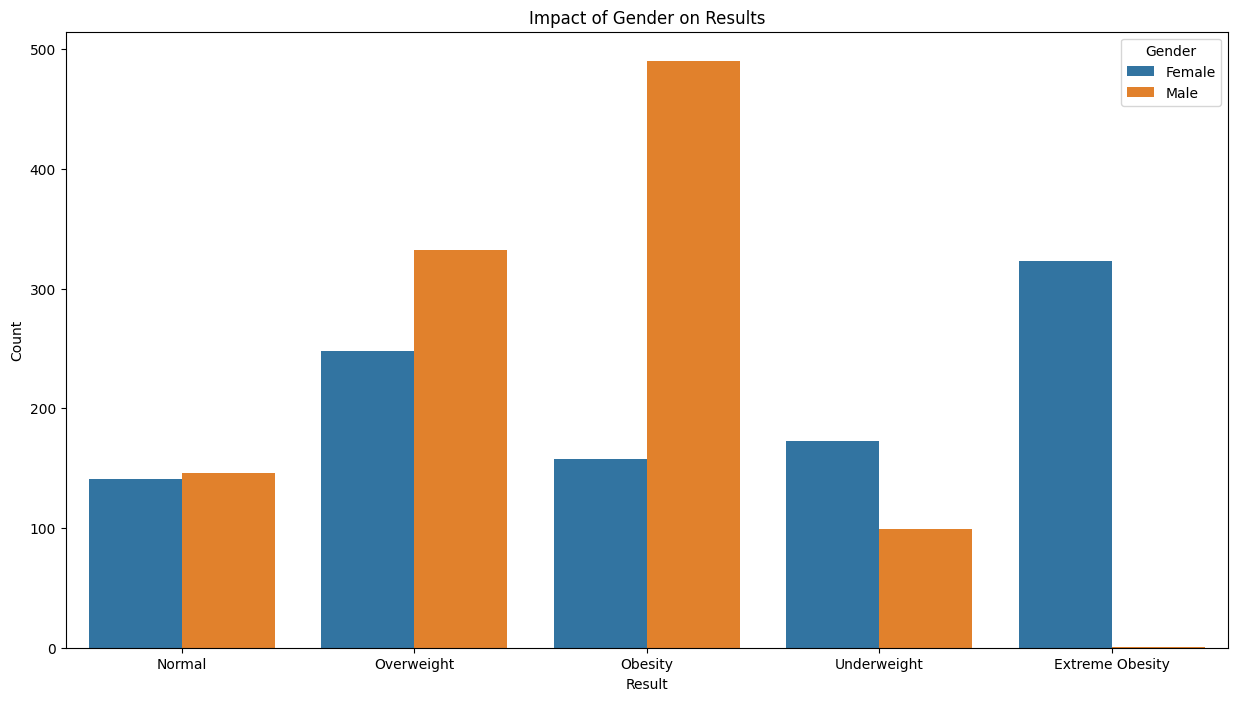

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(x='result', hue='Gender', data=data)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Impact of Gender on Results')
plt.show()


Its clear that gender has no impact on the weight category. The number of females is significantly lower to males in 'Obesity' category while significantly higher in 'Extreme Obesity' category.

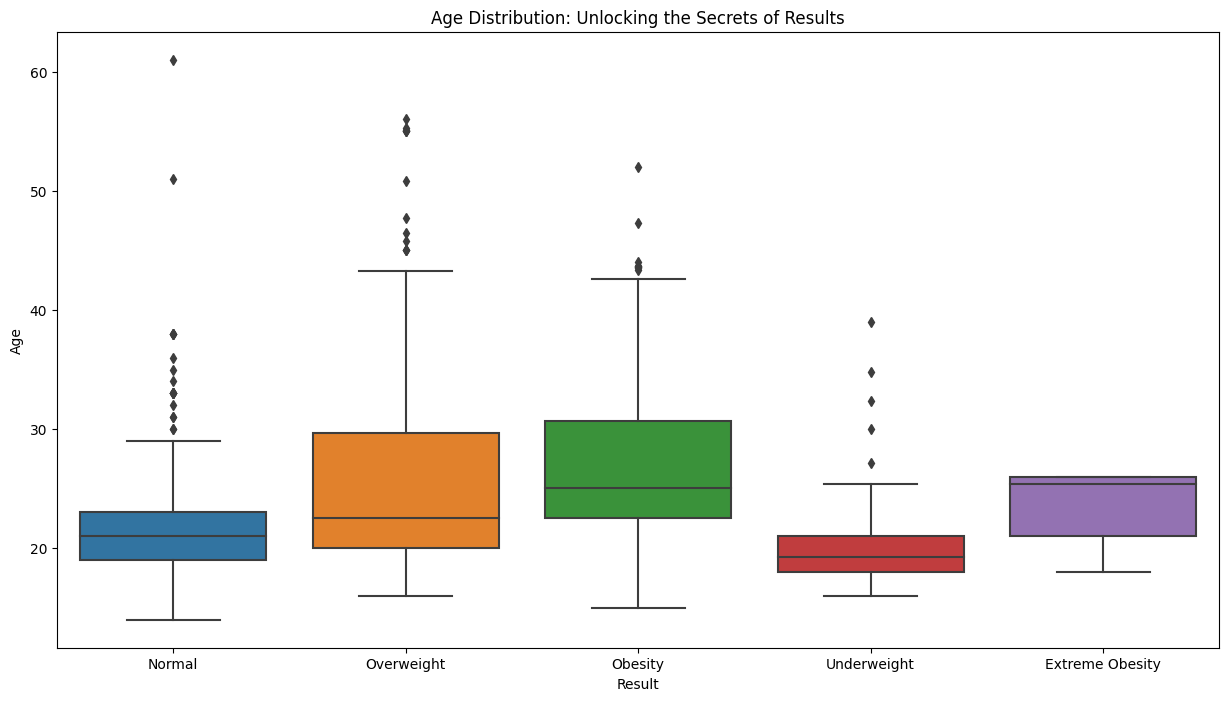

In [68]:
plt.figure(figsize=(15,8))
sns.boxplot(x='result', y='Age', data=data)
plt.xlabel('Result')
plt.ylabel('Age')
plt.title('Age Distribution: Unlocking the Secrets of Results')
plt.show()


This shows how the age group is different for all the categories.The 'normal' people are in their early twenties. The 'overweight' people are between the age of 20-30 years. Teens are 'underweight' while 'Extreme Obese' are in their early and mid 20s.

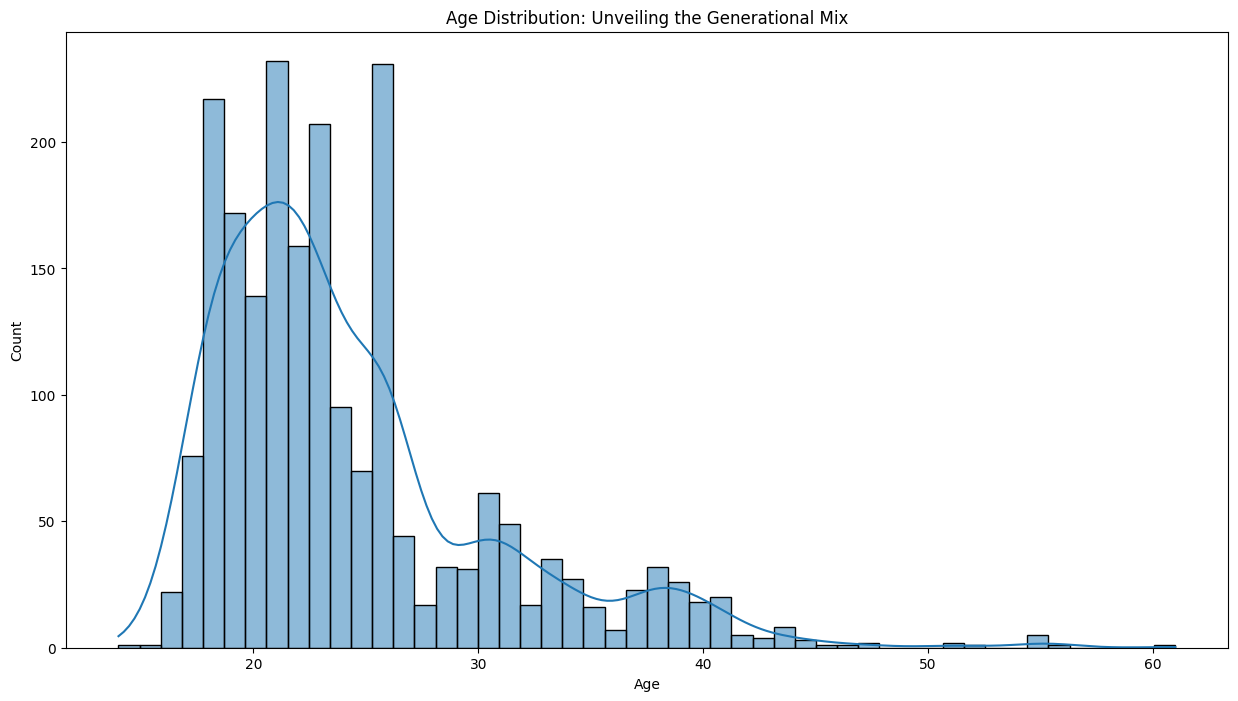

In [69]:
plt.figure(figsize=(15,8))
sns.histplot(data['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution: Unveiling the Generational Mix')
plt.show()


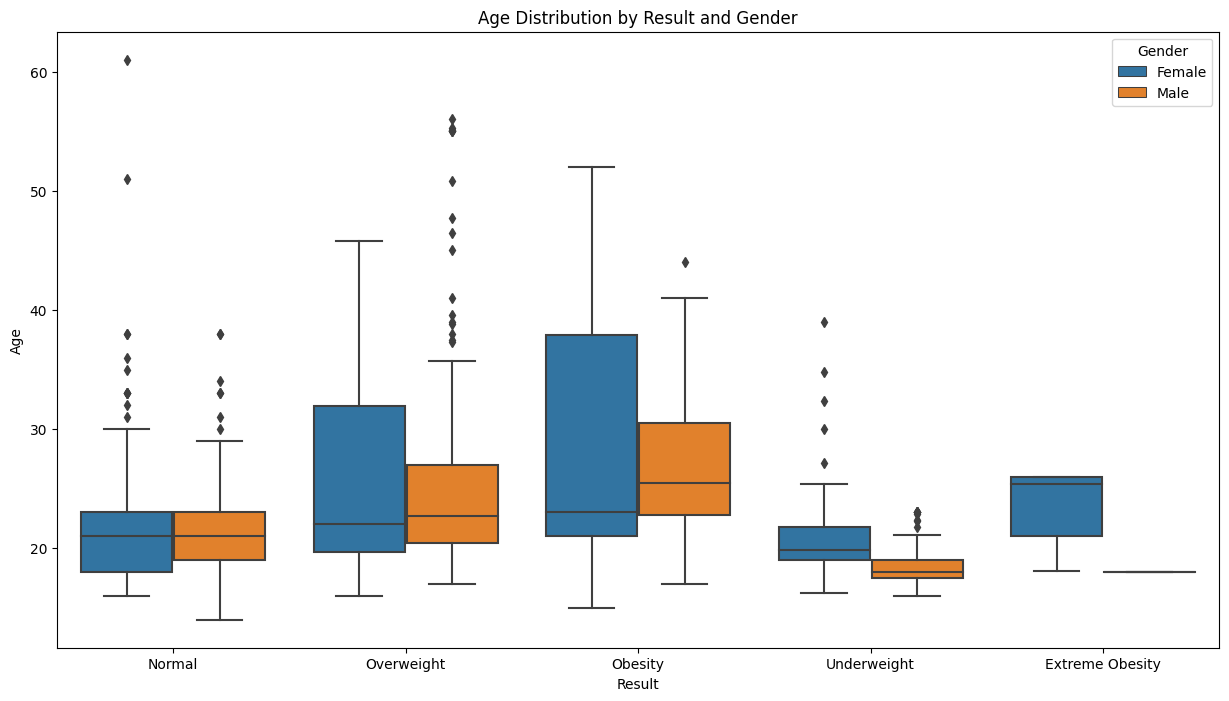

In [70]:
plt.figure(figsize=(15,8))
sns.boxplot(x='result', y='Age', hue='Gender', data=data)
plt.xlabel('Result')
plt.ylabel('Age')
plt.title('Age Distribution by Result and Gender')
plt.show()


This graph shows that both males and females are prone to obesity in their early twenties and later. While its slighlty lower for females, males can be prone obesity until their mid thirties.

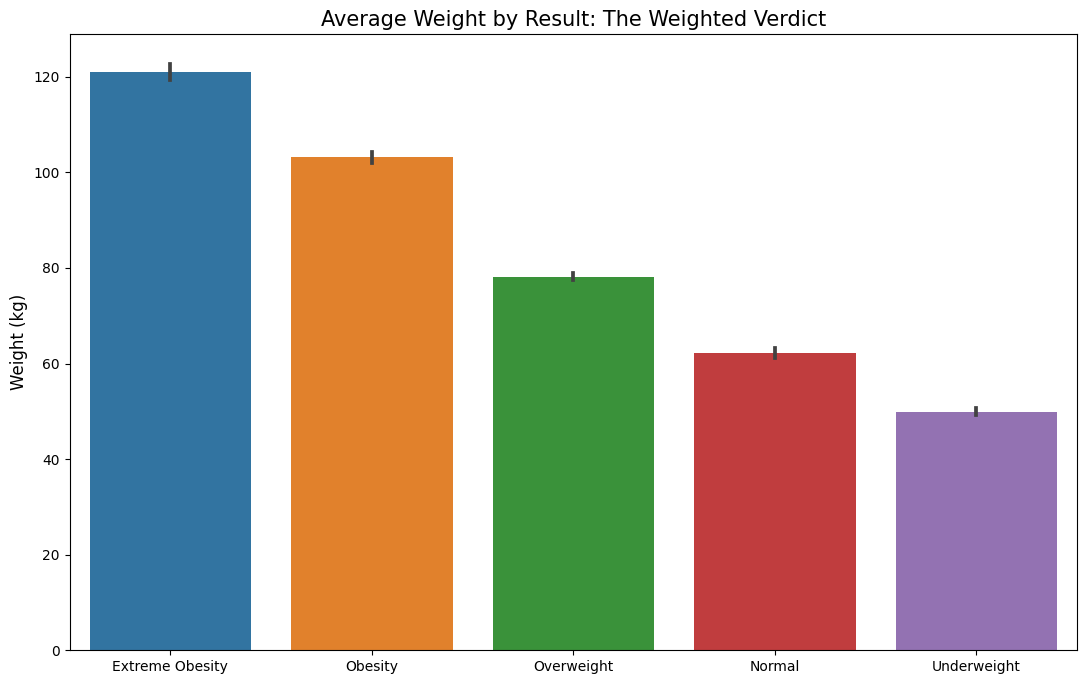

In [71]:
plt.figure(figsize=(13,8))
sns.barplot(x='result',y='Weight',data=data,order=['Extreme Obesity','Obesity','Overweight','Normal','Underweight'])
plt.xlabel(None)
plt.ylabel('Weight (kg)',fontsize=12)
plt.title('Average Weight by Result: The Weighted Verdict',fontsize=15)
plt.show()

As obvious as it should be, 'Extreme obesity' has highest average weight (of around 120kgs) ,followed by 'obesity' with around 100kgs and so on..

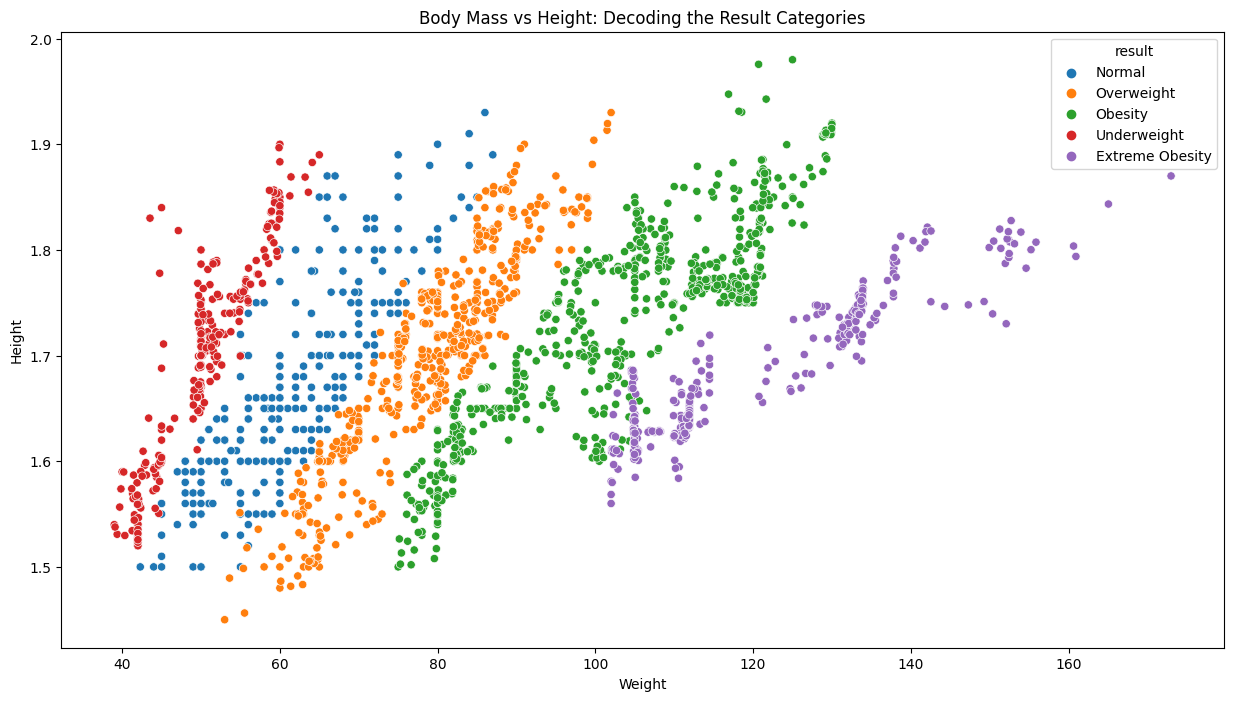

In [72]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Weight', y='Height', hue='result', data=data)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Body Mass vs Height: Decoding the Result Categories')
plt.show()


A comparison of weight and height across various weight categories is shown above. It can be seen how the weight and height ratio decreases as we move towards to 'Extreme obesity' category from 'Underweight'.

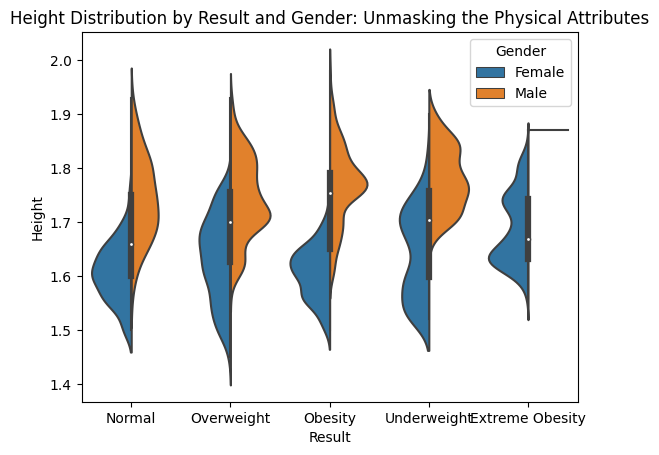

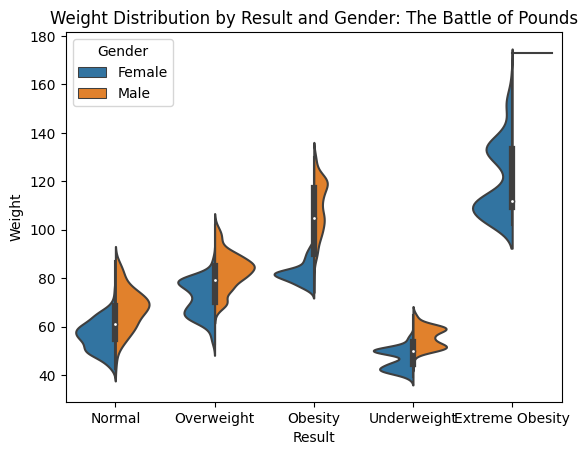

In [73]:
sns.violinplot(x='result', y='Height', hue='Gender', split=True, data=data)
plt.xlabel('Result')
plt.ylabel('Height')
plt.title('Height Distribution by Result and Gender: Unmasking the Physical Attributes')
plt.show()

sns.violinplot(x='result', y='Weight', hue='Gender', split=True, data=data)
plt.xlabel('Result')
plt.ylabel('Weight')
plt.title('Weight Distribution by Result and Gender: The Battle of Pounds')
plt.show()



<Figure size 1500x800 with 0 Axes>

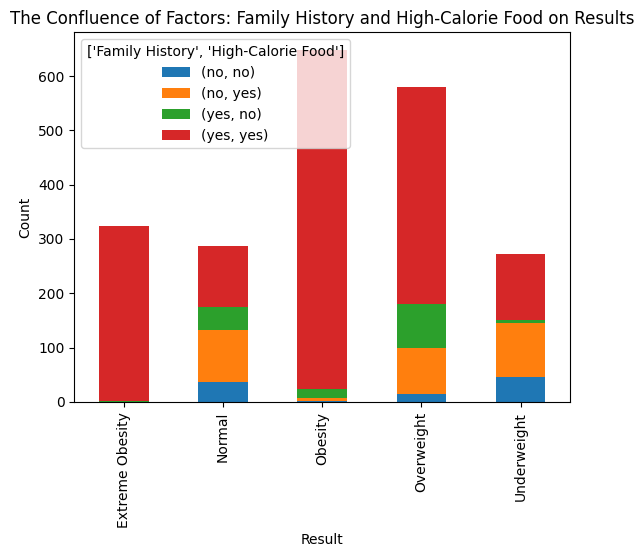

In [74]:
plt.figure(figsize=(15,8))
cross_tab = pd.crosstab(data['result'], [data['family_history_with_overweight'], data['high_cal_food']])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('The Confluence of Factors: Family History and High-Calorie Food on Results')
plt.legend(title=['Family History', 'High-Calorie Food'])
plt.show()


Here we compared the food habits(eating high calorie food) with family history to see if these contribute to the respective person's weight category. While its more evident in 'extreme obesity' category, these two factors may not always contribute directly.

**The other prominent thing is its highly likely that a person who has a family history with overweight will consume high calorie food regularly.**

<Figure size 1500x800 with 0 Axes>

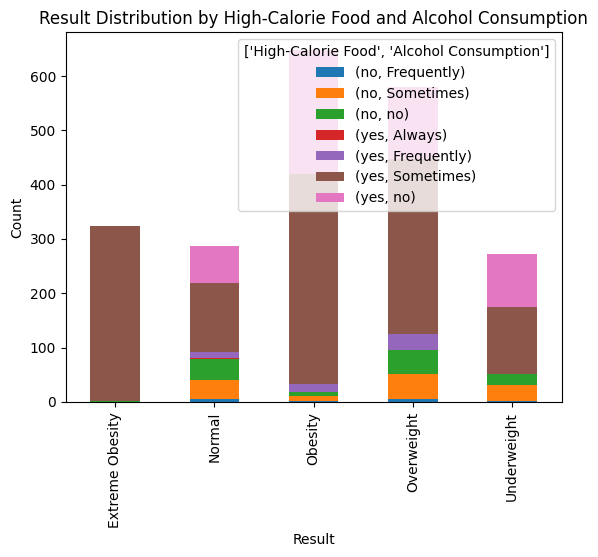

In [75]:
plt.figure(figsize=(15,8))
cross_tab = pd.crosstab(data['result'], [data['high_cal_food'], data['alcohol']])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Result Distribution by High-Calorie Food and Alcohol Consumption')
plt.legend(title=['High-Calorie Food', 'Alcohol Consumption'])
plt.show()


Significant number of people across all the weight categories consume alcohol sometimes and take high calorie food. Also this observation is quite greater among people in 'overweight' and above category.

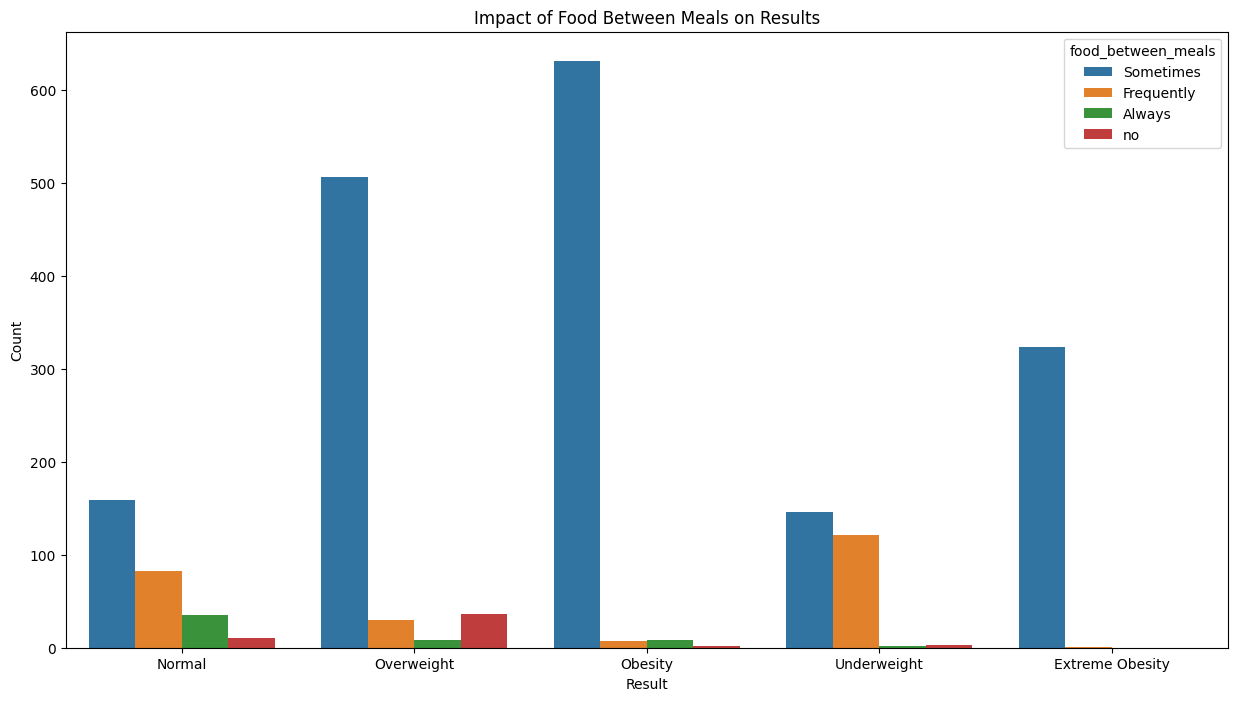

In [76]:
plt.figure(figsize=(15,8))
sns.countplot(x='result', hue='food_between_meals', data=data)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Impact of Food Between Meals on Results')
plt.show()


Significant number of people across all the weight categories take food between the meals. Also this observation is quite greater among people in 'overweight' and above category.

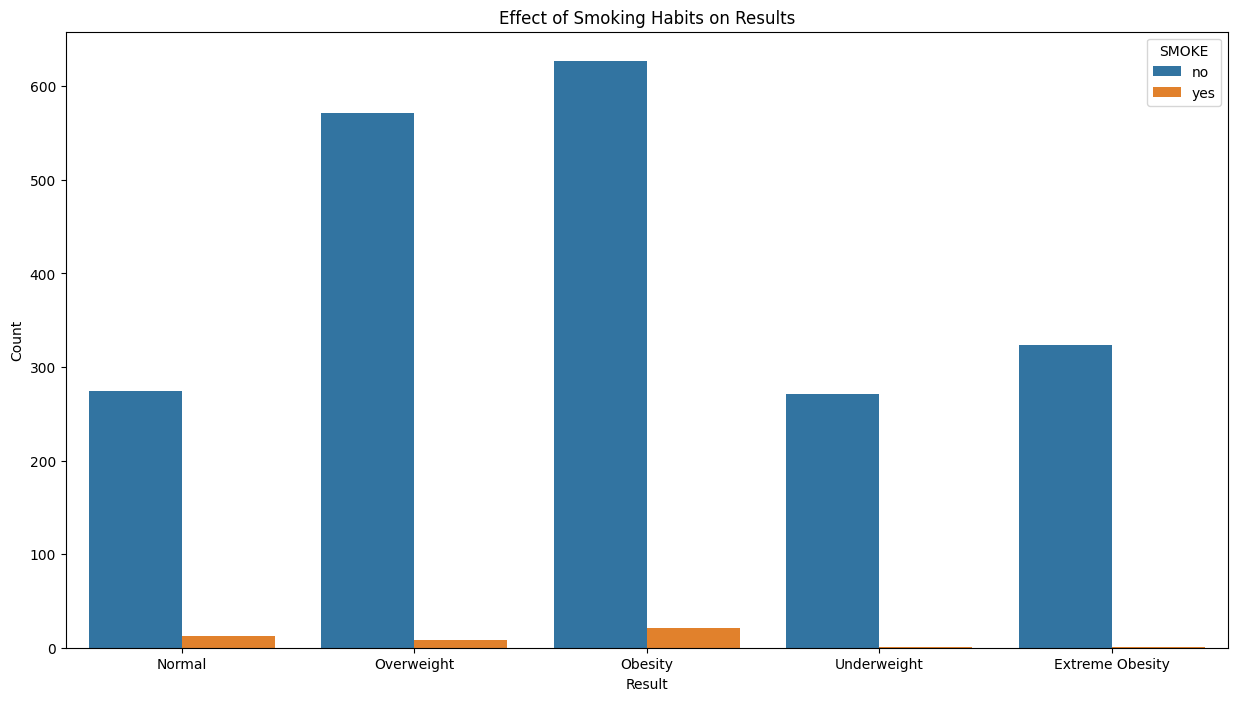

In [77]:
plt.figure(figsize=(15,8))
sns.countplot(x='result', hue='SMOKE', data=data)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Effect of Smoking Habits on Results')
plt.show()


Here, the graph suggests that hardly anyone(people from our dataset) smokes. So it can be inferred if smoking has any effect on weight.

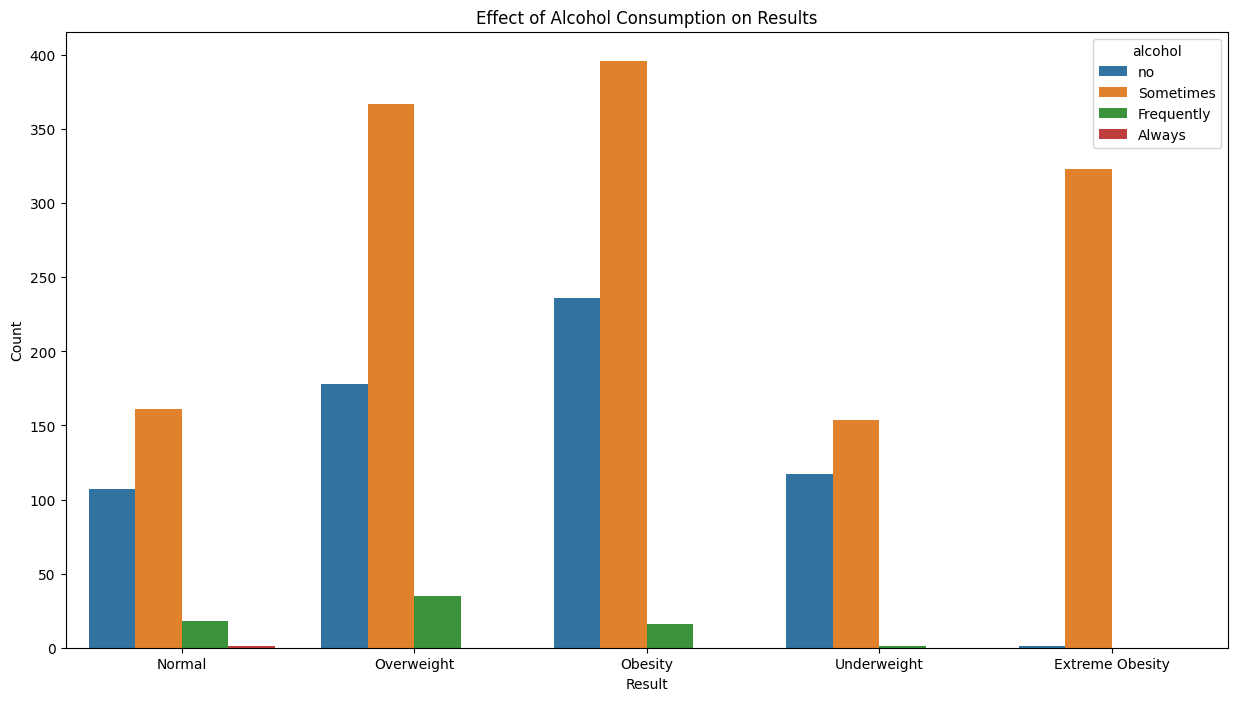

In [78]:
plt.figure(figsize=(15,8))
sns.countplot(x='result', hue='alcohol', data=data)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Effect of Alcohol Consumption on Results')
plt.show()


The number people who consume alcohol sometimes is more than regular consumers and non-consumers across all the weight category. Again, this observation is significantly higher among overweight and above categories.

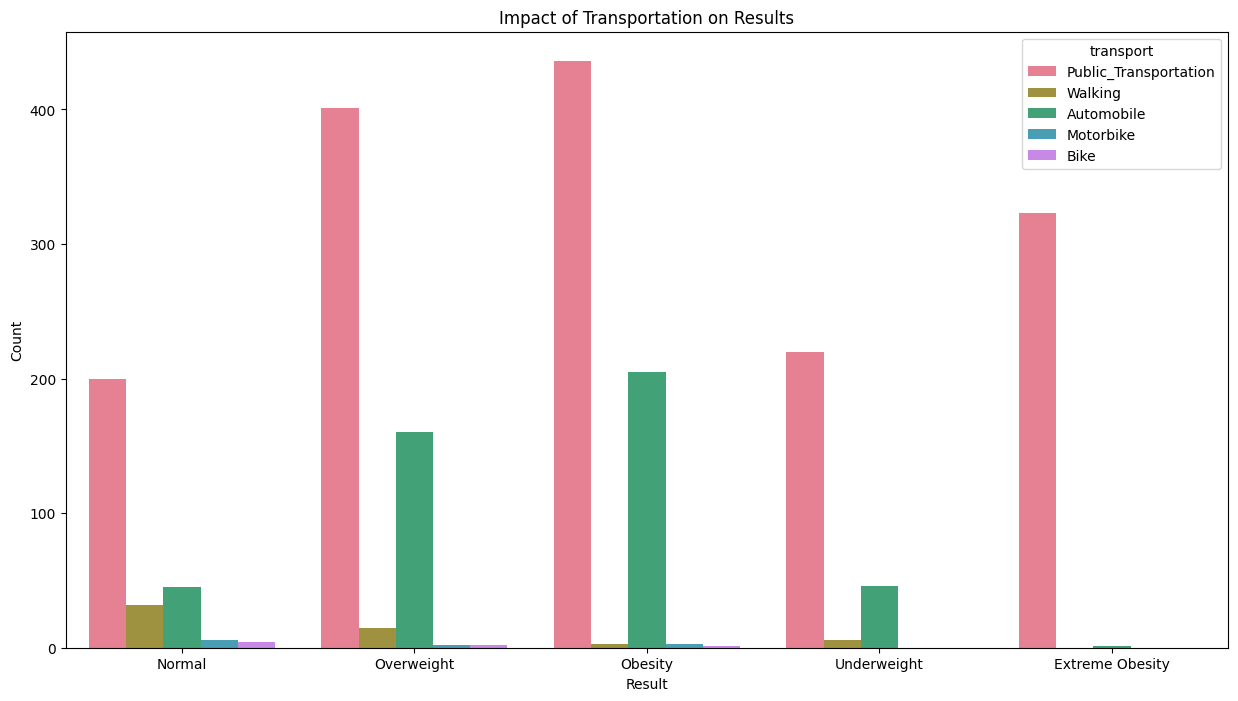

In [79]:
plt.figure(figsize=(15,8))
sns.countplot(x='result', hue='transport', data=data, palette='husl')
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Impact of Transportation on Results')
plt.show()


Most people use public transport to commute. The effect of modes of transport is unclear. The least use modes of transport are Bike, motorbike and walking.

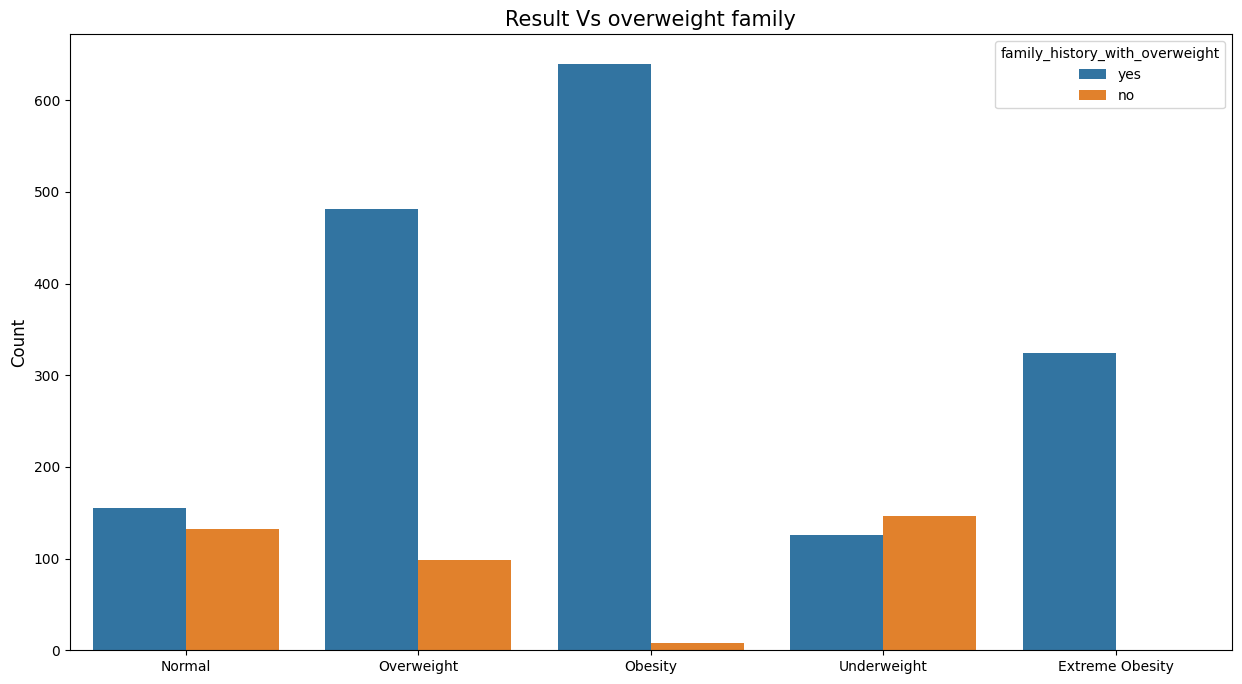

In [80]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=data,hue='family_history_with_overweight')
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs overweight family',fontsize=15)
plt.show()

People having family history with overweight can be found across all the categories. Though, this number is significantly higher in 'overweight' and above categories. **Its almost certain that if a person is from 'Obesity' or 'Extreme Obesity' category, he has a family history with overweight.**

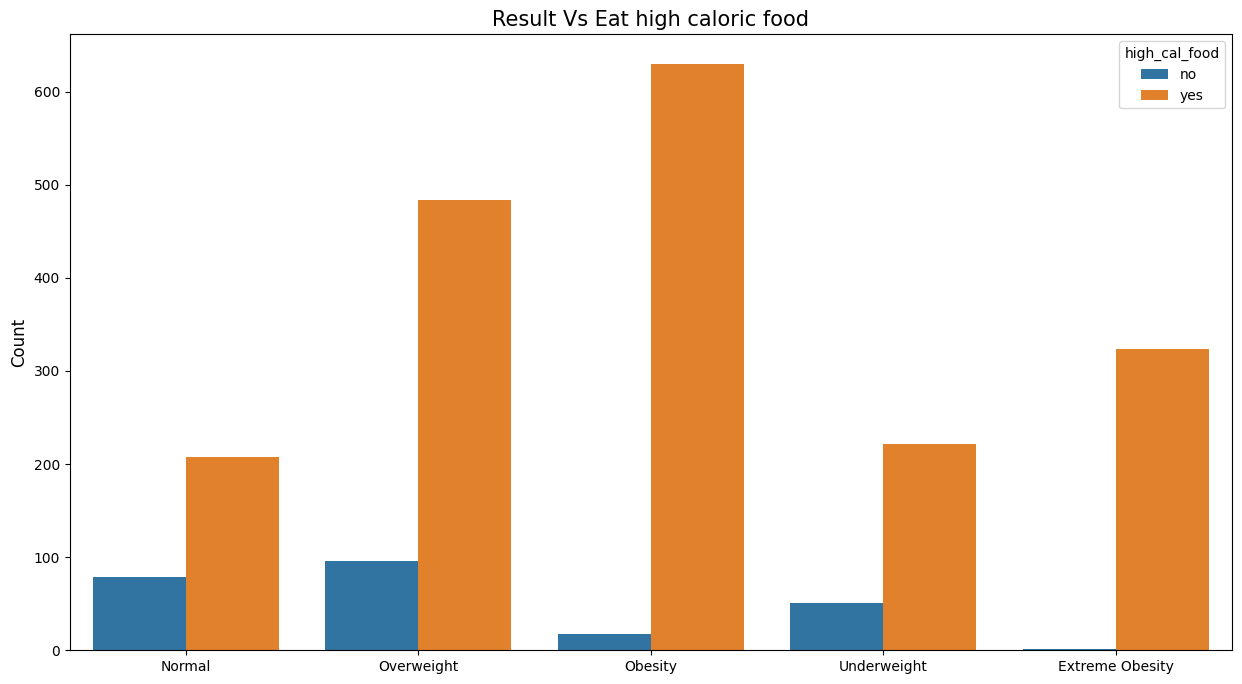

In [81]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=data,hue='high_cal_food')
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Eat high caloric food',fontsize=15)
plt.show()

People eating high caloric food can be found across all the categories. Though, this number is significantly higher in 'overweight' and above categories. **Its very very likely that if a person is from 'Overweight' or 'Obesity' or 'Extreme Obesity' category, he has a family history with overweight.**

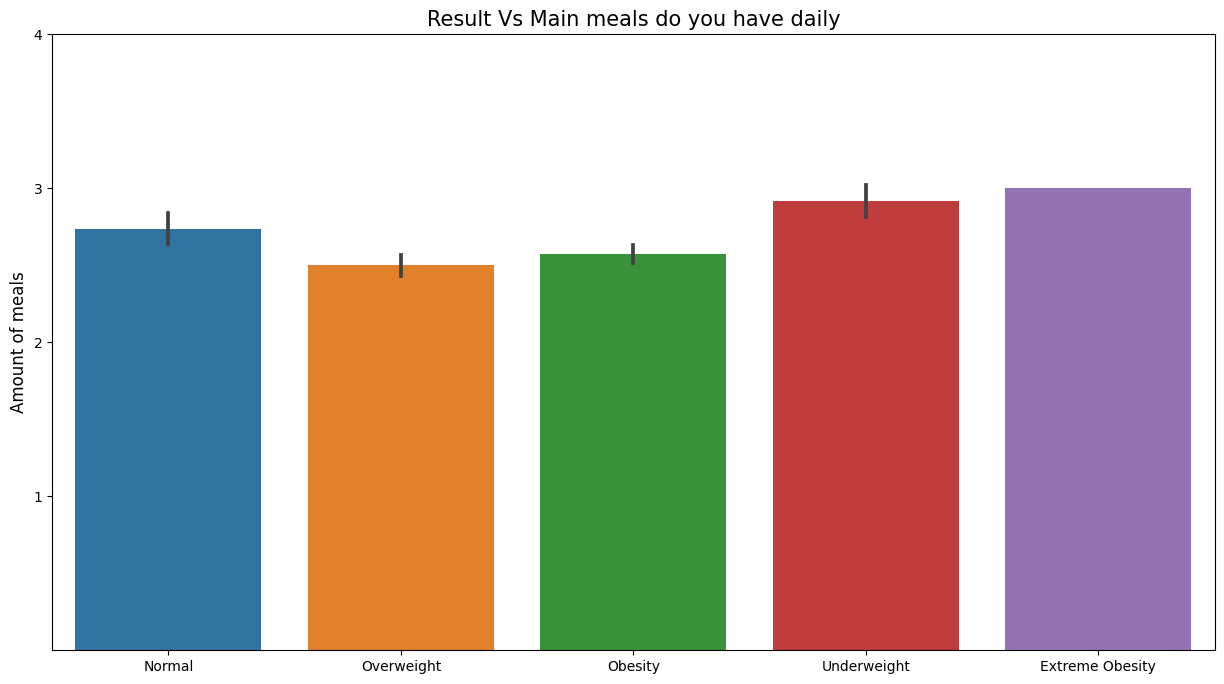

In [82]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='meals',data=data,hue_order=['Extreme Obesity','Obesity','Overweight','Normal','Underweight'])
plt.xlabel(None)
plt.ylabel('Amount of meals',fontsize=12)
plt.yticks(range(1, int(data['meals'].max()) + 1))
plt.title('Result Vs Main meals do you have daily',fontsize=15)
plt.show()

The number of meals taken daily is almost equal across all the categories. This implies that it has number of meals doesn't have any significant effect on the weight of a person.

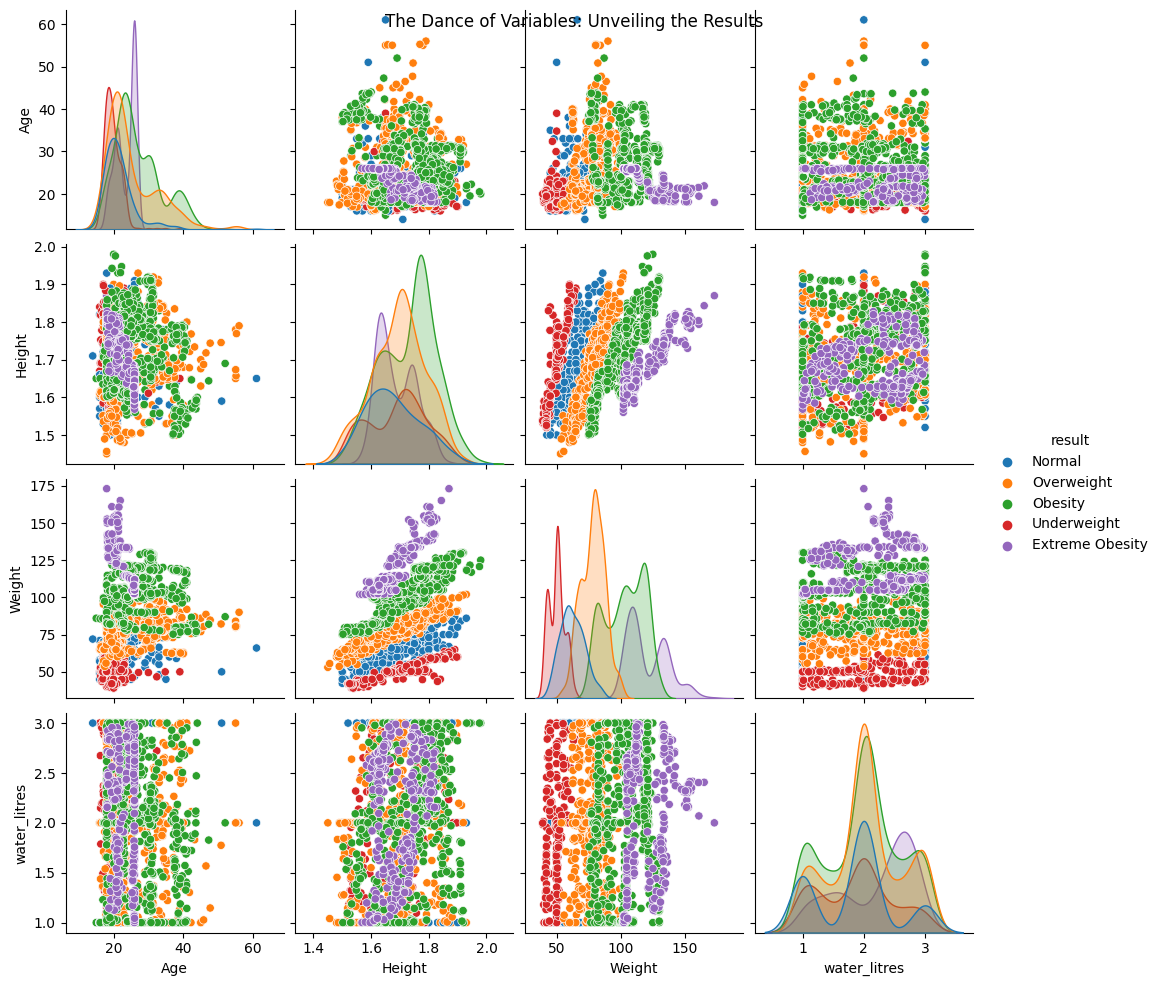

In [83]:
numerical_vars = ['Age', 'Height', 'Weight', 'water_litres']
sns.pairplot(data, vars=numerical_vars, hue='result')
plt.suptitle('The Dance of Variables: Unveiling the Results')
plt.show()


This graph shows the relation among 4 factors.

<ipython-input-84-0684ec53d2f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,


<Axes: >

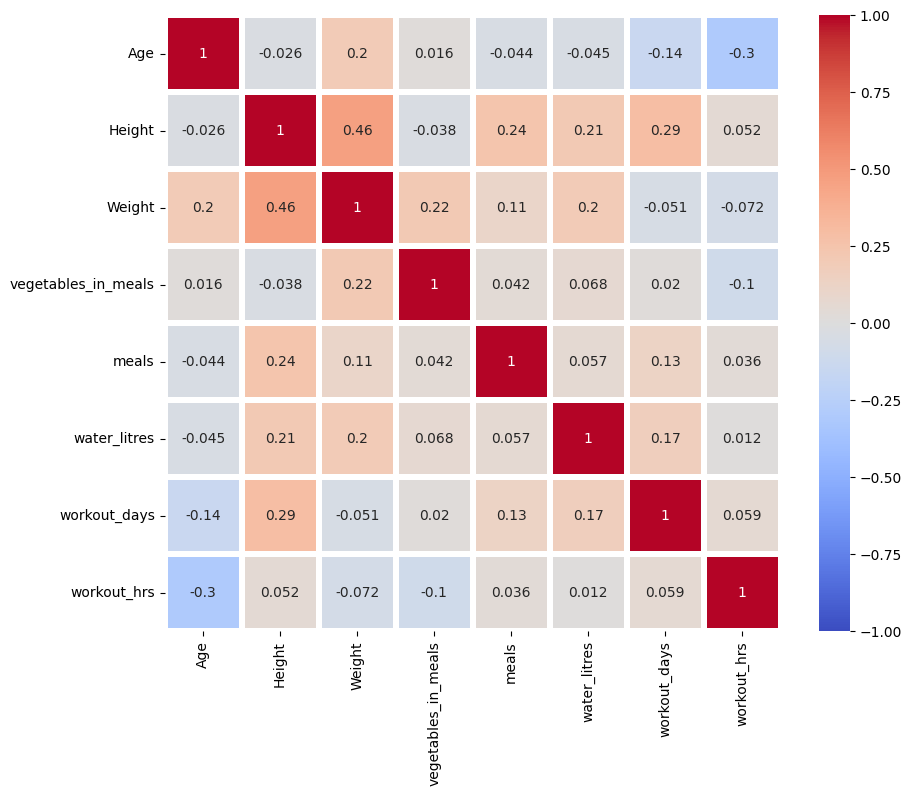

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='coolwarm',linewidths=3)

#Encoding and Feature Scaling

In [85]:
feature = data.drop('result', axis=1)
target = data['result'].values.reshape(-1)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [87]:
le = LabelEncoder()
for column_name in feature.columns:
    if feature[column_name].dtype == object:
        feature[column_name] = le.fit_transform(feature[column_name])
target = le.fit_transform(target)


**The `LabelEncoder` is used to convert categorical values into numerical labels, the `fit_transform` method of the LabelEncoder is used to transform the target variable, converting its categorical values into numerical labels.**

In [88]:
feature.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,vegetables_in_meals,meals,food_between_meals,SMOKE,water_litres,monitor_calories,workout_days,workout_hrs,alcohol,transport
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


**as you can see, now categorical value has been converted to numerical value**

In [89]:
feature.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,vegetables_in_meals,meals,food_between_meals,SMOKE,water_litres,monitor_calories,workout_days,workout_hrs,alcohol,transport
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


In [90]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling on numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature[['Age', 'Height', 'Weight']])

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=['Age', 'Height', 'Weight'])

# Concatenate the scaled features with the categorical variables
features = pd.concat([scaled_data, feature[['Gender', 'family_history_with_overweight', 'high_cal_food', 'vegetables_in_meals', 'meals', 'food_between_meals', 'SMOKE', 'water_litres', 'monitor_calories', 'workout_days', 'workout_hrs', 'alcohol', 'transport']]], axis=1)

# View the final scaled data
features.head()


,Age,Height,Weight,Gender,family_history_with_overweight,high_cal_food,vegetables_in_meals,meals,food_between_meals,SMOKE,water_litres,monitor_calories,workout_days,workout_hrs,alcohol,transport
0,-0.522124,-0.875589,-0.862558,0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,-0.522124,-1.947599,-1.168077,0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,-0.206889,1.054029,-0.366090,1,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,0.423582,1.054029,0.015808,1,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,-0.364507,0.839627,0.122740,1,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


**This step is important to ensure that features are on a similar scale and to avoid certain features dominating the model training process.**

In [91]:
features.describe()

,Age,Height,Weight,Gender,family_history_with_overweight,high_cal_food,vegetables_in_meals,meals,food_between_meals,SMOKE,water_litres,monitor_calories,workout_days,workout_hrs,alcohol,transport
count,2111.000000,2.111000e+03,2.111000e+03,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.000000,-5.385449e-16,-5.385449e-16,0.505921,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230
std,1.000237,1.000237e+00,1.000237e+00,0.500083,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423
min,-1.625448,-2.698006e+00,-1.817304e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.688066,-7.683883e-01,-8.062914e-01,0.000000,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000
50%,-0.241897,-1.263207e-02,-1.369510e-01,1.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000
75%,0.265964,7.159595e-01,7.960531e-01,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000
max,5.782584,2.983646e+00,3.300136e+00,1.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


#Model Selecetion and training

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=3)

In [95]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 0.9361702127659575
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.87      0.72      0.79        57
           2       1.00      0.96      0.98       134
           3       0.90      0.98      0.94       122
           4       0.87      0.94      0.90        50

    accuracy                           0.94       423
   macro avg       0.93      0.92      0.92       423
weighted avg       0.94      0.94      0.93       423



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print("Decision Tree Accuracy:", dtree_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dtree_pred))

Decision Tree Accuracy: 0.9574468085106383
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.87      0.91      0.89        57
           2       0.98      0.98      0.98       134
           3       0.97      0.93      0.95       122
           4       0.96      0.96      0.96        50

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.96       423



In [97]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9598108747044918
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.82      0.93      0.87        57
           2       1.00      0.99      0.99       134
           3       0.96      0.94      0.95       122
           4       1.00      0.92      0.96        50

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.96       423



In [98]:
# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.9479905437352246
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.88      0.74      0.80        57
           2       1.00      0.99      1.00       134
           3       0.92      0.96      0.94       122
           4       0.89      0.98      0.93        50

    accuracy                           0.95       423
   macro avg       0.94      0.93      0.93       423
weighted avg       0.95      0.95      0.95       423



In [99]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dtree_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

Logistic Regression Accuracy: 0.9361702127659575
Decision Tree Accuracy: 0.9574468085106383
Random Forest Accuracy: 0.9598108747044918
SVM Accuracy: 0.9479905437352246


#Testing the models on new data

In [100]:

test_data = pd.DataFrame({'Gender': [0],
                          'Age': [17.0],
                          'Height': [1.65],
                          'Weight': [68.0],
                          'family_history_with_overweight': [1],
                          'high_cal_food': [0],
                          'vegetables_in_meals': [2.0],
                          'meals': [3.0],
                          'food_between_meals': [2],
                          'SMOKE': [0],
                          'water_litres': [2.5],
                          'monitor_calories': [1],
                          'workout_days': [0.0],
                          'workout_hrs': [0.0],
                          'alcohol': [0],
                          'transport': [3]})

# Encode categorical variables in the test data
for column_name in test_data.columns:
    if test_data[column_name].dtype == object:
        # we will ignore unseen labels during encoding
        test_data[column_name] = le.transform(test_data[column_name])

# Scale numerical features in the test data
scaled_test_data = scaler.transform(test_data[['Age', 'Height', 'Weight']])

# Create a new DataFrame with the scaled features
scaled_test_data = pd.DataFrame(scaled_test_data, columns=['Age', 'Height', 'Weight'])

# Concatenate the scaled features with the categorical variables
test_features = pd.concat([scaled_test_data, test_data[['Gender', 'family_history_with_overweight', 'high_cal_food', 'vegetables_in_meals', 'meals', 'food_between_meals', 'SMOKE', 'water_litres', 'monitor_calories', 'workout_days', 'workout_hrs', 'alcohol', 'transport']]], axis=1)


# Make predictions using each model
logreg_pred = logreg.predict(test_features)
dtree_pred = dtree.predict(test_features)
rf_pred = rf.predict(test_features)
svm_pred = svm.predict(test_features)

# Decode the predicted classes
predicted_class_logreg = le.inverse_transform(logreg_pred)
predicted_class_dtree = le.inverse_transform(dtree_pred)
predicted_class_rf = le.inverse_transform(rf_pred)
predicted_class_svm = le.inverse_transform(svm_pred)

# Print the predictions

print("Logistic Regression Prediction:", predicted_class_logreg[0])
print('*'*30)
print("Decision Tree Prediction:", predicted_class_dtree[0])
print('*'*24)
print("Random Forest Prediction:", predicted_class_rf[0])
print('*'*24)
print("SVM Prediction:", predicted_class_svm[0])
print('*'*15)


Logistic Regression Prediction: Overweight
******************************
Decision Tree Prediction: Normal
************************
Random Forest Prediction: Overweight
************************
SVM Prediction: Overweight
***************
